### This notebook contains a Linear Regression model to predict Price of secondhand cars based on its features.
*  **Data source**: Secondhand_car_sales.csv (Available in github repo) <br>
*  **Data preprocessing**: Dropping null values, unwanted features, removing outliers,relaxing OLS assumptions <br>
*  **Model building**: Creating dummies for Categorical features, Feature scaling, Train_Test split, Model training <br>
*  **Model Evaluation**: Calculating adjusted R-squared , Test score, Comparing predicted with actual test targets 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
raw_data = pd.read_csv("E:\\Udemy\\Data science\\Python\\Regression Analysis\\Linear Regression using Sklearn\\Practical example\\Secondhand_car_sales.csv")
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
raw_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [5]:
data_no_na = raw_data.dropna()
data_no_na.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

### Model is a categorical value with 312 unique values so will drop

In [6]:
data1 = data_no_na.drop('Model',axis=1)
data1.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


C:\Users\YOGESHTIGER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

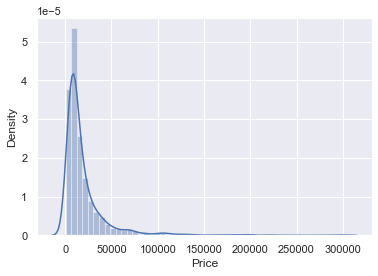

In [7]:
sns.distplot(data1['Price'])

C:\Users\YOGESHTIGER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

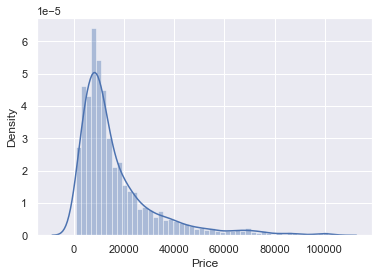

In [8]:
q = data1['Price'].quantile(0.98)
data2 = data1[data1['Price']<q]
sns.distplot(data2['Price'])

In [9]:
data2.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3943,3943.000000,3943,3943.000000,3943.000000,3943,3943,3943.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1515,NaN,NaN,1818,3572,NaN
mean,NaN,16840.689820,NaN,166.739538,2.738415,NaN,NaN,2006.197312
std,NaN,16332.966734,NaN,102.042365,4.980975,NaN,NaN,6.640292
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6900.000000,NaN,95.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,11250.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,20800.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\YOGESHTIGER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

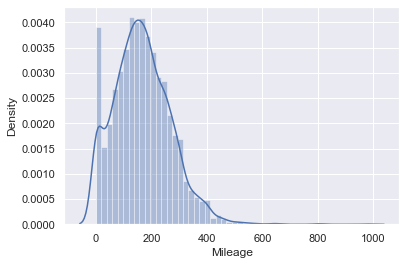

In [10]:
sns.distplot(data2['Mileage'])

C:\Users\YOGESHTIGER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

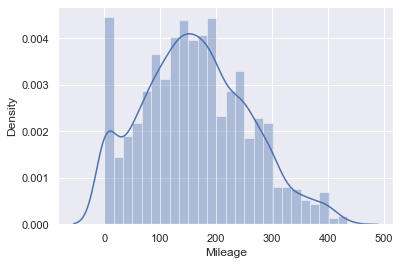

In [11]:
q = data2['Mileage'].quantile(0.99)
data3 = data2[data2['Mileage']<q]
sns.distplot(data3['Mileage'])

In [12]:
data3.describe()

,Price,Mileage,EngineV,Year
count,3903.000000,3903.000000,3903.000000,3903.000000
mean,16928.257740,163.085575,2.742242,2006.294389
std,16346.916322,95.232610,5.005715,6.563430
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,95.000000,1.800000,2003.000000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,20900.000000,230.000000,3.000000,2011.000000
max,103333.000000,435.000000,99.990000,2016.000000


C:\Users\YOGESHTIGER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

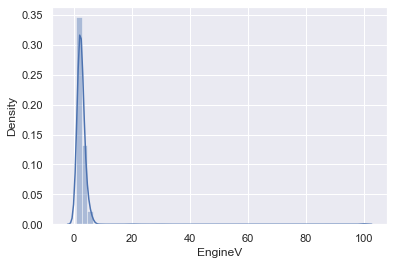

In [13]:
sns.distplot(data3['EngineV'])

C:\Users\YOGESHTIGER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

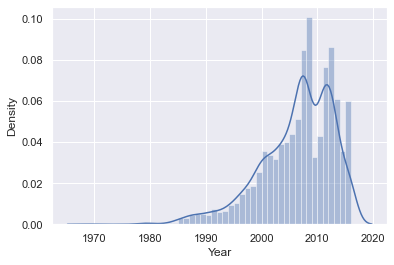

In [14]:
data4 = data3[data3['EngineV']<10]
sns.distplot(data4['Year'])

C:\Users\YOGESHTIGER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

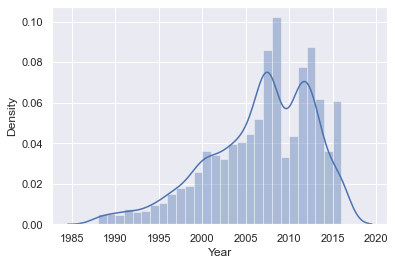

In [15]:
q= data4['Year'].quantile(0.01)
data5 = data4[data4['Year']>q]
sns.distplot(data5['Year'])

In [16]:
data5.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3829,3829.000000,3829,3829.000000,3829.000000,3829,3829,3829.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,849,NaN,1457,NaN,NaN,1772,3466,NaN
mean,NaN,17172.479527,NaN,162.136328,2.445793,NaN,NaN,2006.618177
std,NaN,16393.267151,NaN,94.803403,0.958846,NaN,NaN,6.065856
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,94.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,159.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21000.000000,NaN,227.000000,3.000000,NaN,NaN,2011.000000


### OLS assumptions - Linearity

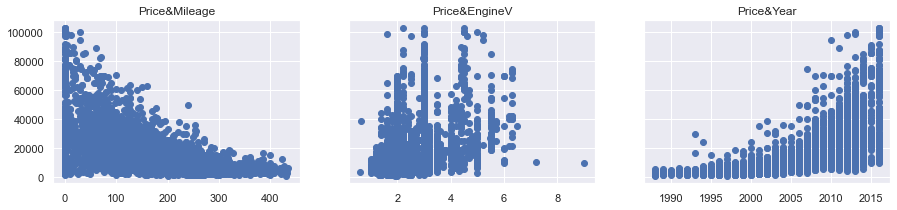

In [17]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize = (15,3))
ax1.scatter(data5['Mileage'],data5['Price'])
ax1.set_title('Price&Mileage')
ax2.scatter(data5['EngineV'],data5['Price'])
ax2.set_title('Price&EngineV')
ax3.scatter(data5['Year'],data5['Price'])
ax3.set_title('Price&Year')
plt.show()


C:\Users\YOGESHTIGER\AppData\Local\Temp\ipykernel_7696\665067981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5['log_price'] = np.log(data5['Price'])
C:\Users\YOGESHTIGER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_price', ylabel='Density'>

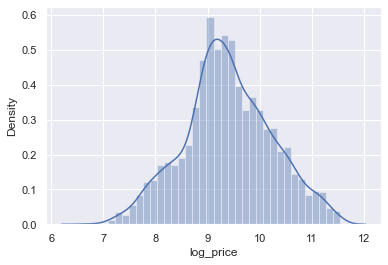

In [18]:
#There is no linearity between Price & EngineV and earlier observed exponential distribution for Price so will use log
data5['log_price'] = np.log(data5['Price'])
sns.distplot(data5['log_price'])

In [19]:
data5.describe(include = 'all')


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
count,3829,3829.000000,3829,3829.000000,3829.000000,3829,3829,3829.000000,3829.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,849,NaN,1457,NaN,NaN,1772,3466,NaN,NaN
mean,NaN,17172.479527,NaN,162.136328,2.445793,NaN,NaN,2006.618177,9.392073
std,NaN,16393.267151,NaN,94.803403,0.958846,NaN,NaN,6.065856,0.850210
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,6.684612
25%,NaN,7200.000000,NaN,94.000000,1.800000,NaN,NaN,2003.000000,8.881836
50%,NaN,11500.000000,NaN,159.000000,2.200000,NaN,NaN,2008.000000,9.350102
75%,NaN,21000.000000,NaN,227.000000,3.000000,NaN,NaN,2011.000000,9.952278


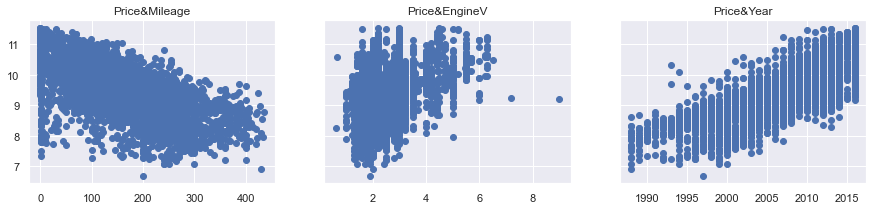

In [20]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize = (15,3))
ax1.scatter(data5['Mileage'],data5['log_price'])
ax1.set_title('Price&Mileage')
ax2.scatter(data5['EngineV'],data5['log_price'])
ax2.set_title('Price&EngineV')
ax3.scatter(data5['Year'],data5['log_price'])
ax3.set_title('Price&Year')
plt.show()

In [21]:
data_preprocessed = data5.reset_index(drop=True)
data_preprocessed.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
count,3829,3829.000000,3829,3829.000000,3829.000000,3829,3829,3829.000000,3829.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,849,NaN,1457,NaN,NaN,1772,3466,NaN,NaN
mean,NaN,17172.479527,NaN,162.136328,2.445793,NaN,NaN,2006.618177,9.392073
std,NaN,16393.267151,NaN,94.803403,0.958846,NaN,NaN,6.065856,0.850210
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,6.684612
25%,NaN,7200.000000,NaN,94.000000,1.800000,NaN,NaN,2003.000000,8.881836
50%,NaN,11500.000000,NaN,159.000000,2.200000,NaN,NaN,2008.000000,9.350102
75%,NaN,21000.000000,NaN,227.000000,3.000000,NaN,NaN,2011.000000,9.952278


In [22]:
data_clean = data_preprocessed.drop('Price',axis=1)
data_clean.describe(include = 'all')

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
count,3829,3829,3829.000000,3829.000000,3829,3829,3829.000000,3829.000000
unique,7,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,849,1457,NaN,NaN,1772,3466,NaN,NaN
mean,NaN,NaN,162.136328,2.445793,NaN,NaN,2006.618177,9.392073
std,NaN,NaN,94.803403,0.958846,NaN,NaN,6.065856,0.850210
min,NaN,NaN,0.000000,0.600000,NaN,NaN,1988.000000,6.684612
25%,NaN,NaN,94.000000,1.800000,NaN,NaN,2003.000000,8.881836
50%,NaN,NaN,159.000000,2.200000,NaN,NaN,2008.000000,9.350102
75%,NaN,NaN,227.000000,3.000000,NaN,NaN,2011.000000,9.952278


In [23]:
#data_clean1 = data_clean.drop(['EngineV'], axis=1)
#Dropping the engineV decresed our r2& adj r2

In [24]:
#Dealing with categorical values
data_dum = pd.get_dummies(data_clean , drop_first = True)
data_dum.head()

,Mileage,EngineV,Year,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1991,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,1999,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,2003,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,2007,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,2011,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Assumptions - Multicollinearity

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var = data_dum.drop('log_price',axis=1)
vif_df = pd.DataFrame()
vif_df['Features'] = var.columns
vif_df['VIF'] = [variance_inflation_factor(var.values, i) for i in range(var.shape[1])]
vif_df

,Features,VIF
0,Mileage,4.943521
1,EngineV,11.640466
2,Year,44.116318
3,Brand_BMW,2.603796
4,Brand_Mercedes-Benz,3.013605
5,Brand_Mitsubishi,1.950526
6,Brand_Renault,2.445376
7,Brand_Toyota,2.476183
8,Brand_Volkswagen,3.463084
9,Body_hatch,1.689654


In [26]:
# Scaling the features
target = data_dum['log_price']
features = data_dum.drop(['log_price'], axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features)
features = scaler.transform(features)

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state = 42)

In [28]:
reg = LinearRegression()
result = reg.fit(x_train, y_train)
result.score(x_train, y_train)

0.8867326951403678

In [29]:
#Calculating adj r-squared
n = x_train.shape[0]
k = x_train.shape[1]
r2 = result.score(x_train, y_train)
adj_r2 = 1 - (1 - r2) * (n-1)/(n-k-1)
adj_r2

0.8860629147568351

In [30]:
summary_df = pd.DataFrame(data = np.exp(result.predict(x_test)), columns=['Predictions'])
summary_df

,Predictions
0,4291.950326
1,24235.956598
2,22079.392864
3,9381.054914
4,7569.580786
...,...
761,38699.739245
762,13469.143196
763,23201.651422
764,4267.886525


In [31]:
targets = y_test.reset_index(drop=True)
summary_df['Targets'] = np.exp(targets)
summary_df

,Predictions,Targets
0,4291.950326,3300.0
1,24235.956598,21999.0
2,22079.392864,29600.0
3,9381.054914,10500.0
4,7569.580786,8500.0
...,...,...
761,38699.739245,45000.0
762,13469.143196,15900.0
763,23201.651422,21700.0
764,4267.886525,4100.0


In [32]:
summary_df['Residuals'] = summary_df['Targets'] - summary_df['Predictions']
summary_df

,Predictions,Targets,Residuals
0,4291.950326,3300.0,-991.950326
1,24235.956598,21999.0,-2236.956598
2,22079.392864,29600.0,7520.607136
3,9381.054914,10500.0,1118.945086
4,7569.580786,8500.0,930.419214
...,...,...,...
761,38699.739245,45000.0,6300.260755
762,13469.143196,15900.0,2430.856804
763,23201.651422,21700.0,-1501.651422
764,4267.886525,4100.0,-167.886525


C:\Users\YOGESHTIGER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Residuals', ylabel='Density'>

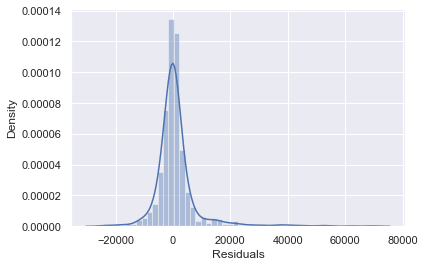

In [33]:
sns.distplot(summary_df['Residuals'])

In [46]:
print("Model's final test score is: {:.2f}%".format(result.score(x_test, y_test)*100))

Model's final test score is: 87.40%
